<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="HEIG-VD Logo" width="100" align="right" /> 

# TAL Labo 1c : Opérations sur une page web en anglais

**Objectif** 

Dans cette troisième partie du Labo1, vous allez refaire une partie des traitements de la partie 1b, mais cette fois-ci sur une page web, spécifiquement une page Wikipedia en anglais (suggestion : "Switzerland").  L'objectif est de réviser les principales commandes apprises, et de traiter le format HTML.

In [21]:
import nltk
import os
from urllib import request
import matplotlib.pyplot 
%matplotlib inline

**1.** S'inspirer du [chapitre 3 du livre NLTK](http://www.nltk.org/book/ch03.html) pour faire une requête et récupérer le contenu de la page indiquée dans `url2`.  Quelle est la longueur de la chaîne de caractères obtenue ?

In [22]:
url2 = "https://en.wikipedia.org/wiki/Switzerland" 
response = request.urlopen(url2)
raw = response.read().decode('utf8')

print('Longueur :', len(raw))

Longueur : 1033174


In [23]:
idx_start = raw.find('<b>Switzerland</b>')
idx_end = raw.find('<h2 id="See_also">See also</h2>')

main_part = raw[idx_start:idx_end]

print('Longueur :', len(main_part))
print('idx_start :', idx_start)
print('idx_end :', idx_end)

Longueur : 318168
idx_start : 201885
idx_end : 520053


Nous utilserons l'outil `BeautifulSoup` disponible sous forme de module Python pour extraire tout le texte de la page HTML.  Si le code source de la page est stocké dans `html2`, on extrait le texte dans `raw2`.

In [24]:
from bs4 import BeautifulSoup

In [25]:
raw2 = BeautifulSoup(main_part).get_text()


**2.** Veuillez réutiliser la méthode du _notebook_ 1b pour enlever le début et la fin de la chaîne `raw2`, car ils contiennent du texte qui n'est pas pertinent pour notre analyse (il ne parle pas de la Suisse).  Quelle est la longueur du résultat ?  Veuillez afficher ses 100 premiers et 100 derniers caractères.

In [26]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.


#  ! Nous avons enlevé le début et la fin du texte avant de le passer a BeautifulSoup pour des raison de simplicité !

print('Longueur :', len(raw2))
print("100 premier char : ", raw2[:100])
print("100 dernier char : ", raw2[-100:])

Longueur : 90636
100 premier char :  Switzerland,[d] officially the Swiss Confederation,[e] is a landlocked country located in west-centr
100 dernier char :  called Fendant in Valais) and Pinot Noir. Merlot is the main variety produced in Ticino.[281][282]




**3.** Veuillez effectuer la segmentation en phrases, puis tokeniser chaque phrase.  Veuillez écrire le résultat (une phrase par ligne, espaces entre *tokens*) dans un fichier `sample_web_page.txt` et inspectez-le avec un éditeur de texte.  Observez-vous des imperfections ?

In [27]:
raw2 = raw2.replace('\n', ' ')

sentences = nltk.sent_tokenize(raw2)

print('Nb de phrases trouvées :', len(sentences))
print(sentences[:4])


sentences_tokens = [nltk.word_tokenize(sentence) for sentence in sentences]

total = sum([len(tokens) for tokens in sentences_tokens])

print('Nb total de tokens :', total)

print(sentences_tokens)

Nb de phrases trouvées : 640
['Switzerland,[d] officially the Swiss Confederation,[e] is a landlocked country located in west-central Europe.', '[f][13] It is bordered by Italy to the south, France to the west, Germany to the north, and Austria and Liechtenstein to the east.', "Switzerland is geographically divided among the Swiss Plateau, the Alps and the Jura; the Alps occupy the greater part of the territory, whereas most of the country's nearly 9 million people are concentrated on the plateau, which hosts its largest cities and economic centres, including Zurich, Geneva, and Lausanne.", '[14] Switzerland is a federal republic composed of 26 cantons, with federal authorities based in Bern.']
Nb total de tokens : 17195
[['Switzerland', ',', '[', 'd', ']', 'officially', 'the', 'Swiss', 'Confederation', ',', '[', 'e', ']', 'is', 'a', 'landlocked', 'country', 'located', 'in', 'west-central', 'Europe', '.'], ['[', 'f', ']', '[', '13', ']', 'It', 'is', 'bordered', 'by', 'Italy', 'to', 'th

In [28]:
filename = "sample_web_page.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_web_page.txt
if os.path.exists(filename): 
    os.remove(filename)
fd = open(filename, 'a', encoding='utf8')
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
for tokens in sentences_tokens:
    for token in tokens:
        fd.write(token + ' ')
    fd.write('\n')

fd.close()

*Votre appréciation de la qualité ici :*

La tokenisation semble correcte. Neanmoins, il y a des imperfections comme pour les notes qui sont entre crochets et qui sont donc séparées en plusieurs tokens.

**4.** Veuillez maintenant effectuer la tokenisation de cette page **sans** faire de segmentation en phrases.  Stockez le résultat dans une variable (p.ex. `words2`) sans écrire de fichier.  Combien de tokens possède ce texte ?

In [29]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.

words2 = nltk.word_tokenize(raw2)
print('Nb tokens :', len(words2))
print(words2)


Nb tokens : 17194
['Switzerland', ',', '[', 'd', ']', 'officially', 'the', 'Swiss', 'Confederation', ',', '[', 'e', ']', 'is', 'a', 'landlocked', 'country', 'located', 'in', 'west-central', 'Europe', '.', '[', 'f', ']', '[', '13', ']', 'It', 'is', 'bordered', 'by', 'Italy', 'to', 'the', 'south', ',', 'France', 'to', 'the', 'west', ',', 'Germany', 'to', 'the', 'north', ',', 'and', 'Austria', 'and', 'Liechtenstein', 'to', 'the', 'east', '.', 'Switzerland', 'is', 'geographically', 'divided', 'among', 'the', 'Swiss', 'Plateau', ',', 'the', 'Alps', 'and', 'the', 'Jura', ';', 'the', 'Alps', 'occupy', 'the', 'greater', 'part', 'of', 'the', 'territory', ',', 'whereas', 'most', 'of', 'the', 'country', "'s", 'nearly', '9', 'million', 'people', 'are', 'concentrated', 'on', 'the', 'plateau', ',', 'which', 'hosts', 'its', 'largest', 'cities', 'and', 'economic', 'centres', ',', 'including', 'Zurich', ',', 'Geneva', ',', 'and', 'Lausanne', '.', '[', '14', ']', 'Switzerland', 'is', 'a', 'federal', 're

**5.** Veuillez créer un objet de type `nltk.Text` à partir de la liste de *tokens* `words2`.
* Déterminez le vocabulaire de cette page (la liste des _types_) en convertissant cet objet en un `set`.  
* Combien de mots différents y a-t-il dans le vocabulaire, incluant les ponctuations et tout autre symbole ? 
* Quels sont les 20 types les plus longs ? Que pensez-vous du résultat trouvé ?

In [38]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
text = nltk.Text(tokens=words2)

types = set(text)
print('Nb de types :', len(types))
print(sorted(types, key=len, reverse=True)[:20])

Nb de types : 4145
['Donau-Iller-Rhine-Limes', '65,000-kilometre-long', 'Switzerland–European', 'machines/electronics', 'policies—contributes', 'non-German-speaking', 'instruments/watches', '57.1-kilometre-long', 'multi-disciplinary', 'autobahn/autoroute', 'commander-in-chief', 'near-Mediterranean', 'Telecommunication', 'pre-revolutionary', 'Gallen-Altenrhein', 'Weiterentwicklung', 'Non-Proliferation', 'pastures/grazing', 'Romansh-speaking', 'Franco-Provençal']


*Réponse :*

Il y a 4145 types différents dans le vocabulaire. Les 20 types les plus longs sont des mots composés de plusieurs mots.

Ces résultats semble plutot logiques, car la page wikipedia est bien plus petite que le livre utilisé dans le notebook 1b.

**6.** Veuillez construire un objet `FreqDist` avec les mots de cette page, en convertissant en minuscules tous les mots contenant seulement des lettres (utilisez la méthode `.isalpha()` de Python).  Quels sont les 30 mots les plus fréquents ?

In [46]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.

words_lowered = [word.lower() if word.isalpha() else word for word in words2 ]

text_lowered = nltk.Text(tokens=words_lowered)
fd = nltk.FreqDist(text_lowered)
print(fd.most_common(30))

[('the', 1152), (',', 838), ('.', 638), ('of', 555), ('in', 463), ('and', 458), ('[', 398), (']', 398), ('(', 270), (')', 269), ('to', 232), ('switzerland', 224), ('swiss', 183), ('%', 182), ('a', 177), ('is', 151), ('as', 102), ('federal', 94), ('by', 92), ('are', 87), ('for', 87), ('was', 85), (':', 80), ('with', 78), ('from', 70), ("'s", 69), ('it', 61), ('world', 52), ('at', 49), ('has', 47)]


**7.** Veuillez afficher le graphique cumulatif du nombre d'occurrences des 70 mots les plus fréquents de votre texte.

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

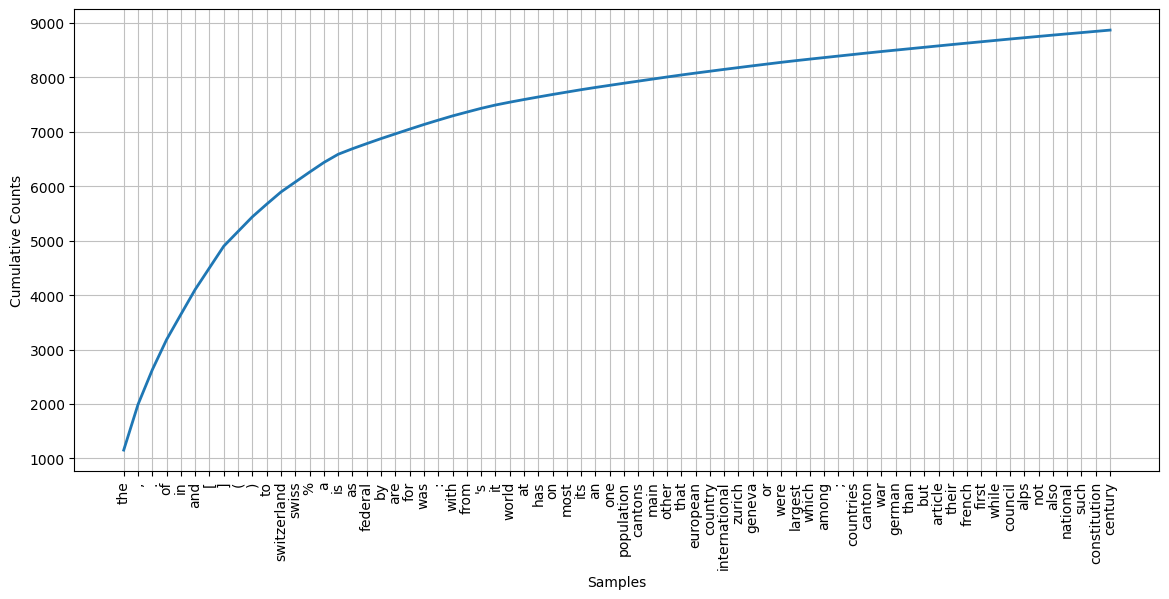

In [48]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
from matplotlib.pyplot import figure

figure(figsize=(14, 6), dpi=100)
fd.plot(70, cumulative=True)

**8.** Veuillez construire une liste avec la longueur de chaque token du texte, créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (non-cumulative) des nombres d'occurrences pour chaque longueur.  Qu'observez-vous ?

<Axes: xlabel='Samples', ylabel='Counts'>

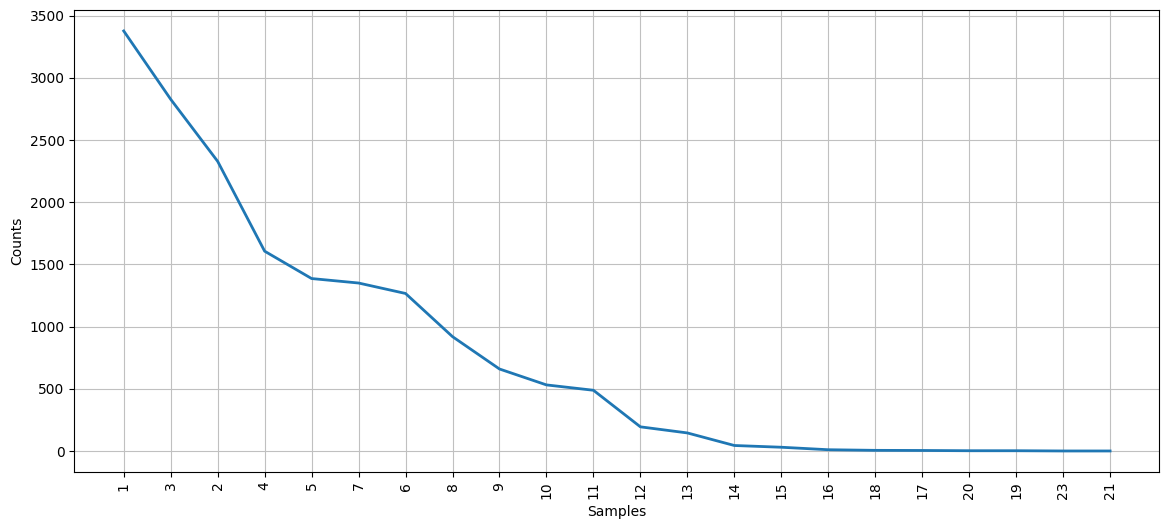

In [49]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
len_token = [len(tok) for tok in words_lowered]
len_token_text = nltk.Text(tokens=len_token)

fdist2 = nltk.FreqDist(len_token_text)

figure(figsize=(14, 6), dpi=100)
fdist2.plot(70, cumulative=False)

*Réponse :*

La longueur la plus fréquente est 1. Ce qui est plutot logique car il y a beaucoup de tokens qui sont des ponctuations ou des crochets par exemple.

On voit aussi que globalement plus les mots sont longs, moins ils sont fréquents. Quelques petites exeptions notamment avec les mots de longueur 2 ou 6.


## Fin de la partie 1c du Labo1
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_ sous le nom `TAL_labo1c_NOM1_NOM2.ipynb`.  Ajoutez-le dans une archive _zip_ avec le _notebook_ 1b, et soumettez l'archive individuellement sur Cyberlearn. 